In [1]:
import pandas as pd

## 1.1

In [2]:
traj = pd.read_csv("2034690_traj.csv")

In [3]:
traj.head()

,Unnamed: 0,Unnamed: 0.1,time,latitude,longitude
0,0,0,737029.354167,-10.922092,-37.051088
1,1,1,737029.355556,-10.922702,-37.051455
2,2,2,737029.356944,-10.922841,-37.051091
3,3,3,737029.358333,-10.923259,-37.051313
4,4,4,737029.359722,-10.921702,-37.051948


In [4]:
traj.shape

(5040, 5)

In [5]:
import datetime as datetime

datetime_object = datetime.datetime.now()
print(datetime_object)
print(datetime_object.timestamp())

2020-03-23 14:51:57.646459
1584985917.646459


In [6]:
higher= traj["time"].max(axis=0)
higher = datetime.datetime.fromtimestamp(higher)
#dt_object = datetime.fromtimestamp(higher)

#pd.to_datetime(higher.timestamp(), unit='s')
print(higher)

1970-01-09 09:43:56.352778


In [7]:
lower= traj["time"].min(axis=0)
lower = datetime.datetime.fromtimestamp(lower)
#dt_object = datetime.fromtimestamp(higher)

#pd.to_datetime(higher.timestamp(), unit='s')
print(lower)

1970-01-09 09:43:49.354167


## 1.2

In [8]:
dates = []
for i in traj["time"]:
    date =pd.to_datetime(datetime.datetime.fromtimestamp(i).isoformat())
    dates.append(date)
    

In [9]:
#dates

[Timestamp('1970-01-09 09:43:49.354167'),
 Timestamp('1970-01-09 09:43:49.355556'),
 Timestamp('1970-01-09 09:43:49.356944'),
 Timestamp('1970-01-09 09:43:49.358333'),
 Timestamp('1970-01-09 09:43:49.359722'),
 Timestamp('1970-01-09 09:43:49.361111'),
 Timestamp('1970-01-09 09:43:49.362500'),
 Timestamp('1970-01-09 09:43:49.363889'),
 Timestamp('1970-01-09 09:43:49.365278'),
 Timestamp('1970-01-09 09:43:49.366667'),
 Timestamp('1970-01-09 09:43:49.368056'),
 Timestamp('1970-01-09 09:43:49.369444'),
 Timestamp('1970-01-09 09:43:49.370833'),
 Timestamp('1970-01-09 09:43:49.372222'),
 Timestamp('1970-01-09 09:43:49.373611'),
 Timestamp('1970-01-09 09:43:49.375000'),
 Timestamp('1970-01-09 09:43:49.376389'),
 Timestamp('1970-01-09 09:43:49.377778'),
 Timestamp('1970-01-09 09:43:49.379167'),
 Timestamp('1970-01-09 09:43:49.380556'),
 Timestamp('1970-01-09 09:43:49.381944'),
 Timestamp('1970-01-09 09:43:49.383333'),
 Timestamp('1970-01-09 09:43:49.384722'),
 Timestamp('1970-01-09 09:43:49.38

In [10]:
import matplotlib.pyplot as plt


C:\Users\Aldo\Anaconda3\envs\TM1920\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Time')

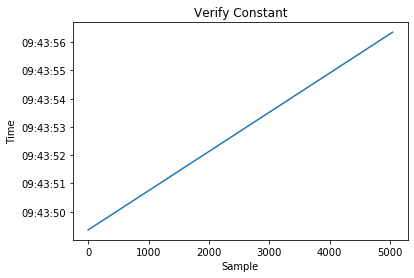

In [11]:
plt.plot(dates)
plt.title('Verify Constant')
plt.xlabel('Sample')
plt.ylabel('Time')


## 1.3

Text(0, 0.5, 'longitude')

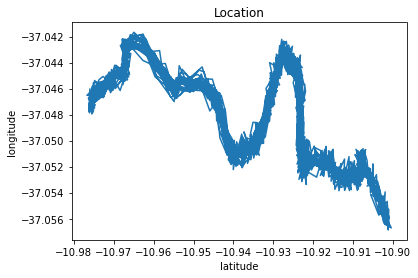

In [12]:
plt.plot(traj["latitude"],traj["longitude"])
plt.title('Location')
plt.xlabel('latitude')
plt.ylabel('longitude')


## 1.4

In [13]:
from mpl_toolkits import mplot3d

Text(0.5, 0, 'longitude 3D')

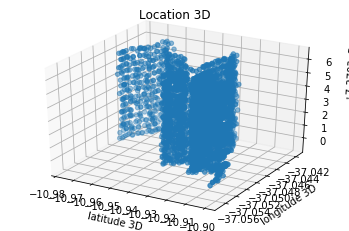

In [14]:
fig = plt.figure()


ax = plt.axes(projection='3d')
threed =ax.scatter3D(traj["latitude"],traj["longitude"],traj["time"],cmap='Greens')
plt.title('Location 3D')
plt.xlabel('latitude 3D')
plt.ylabel('longitude 3D')

## 1.5

In [15]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf

0.9681414816911155


Text(0.5, 1.0, 'Autocorrelation - location')

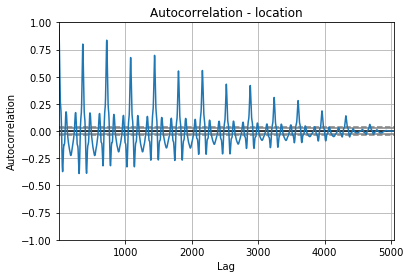

In [16]:
location2 = (traj["latitude"]*traj["latitude"]+traj["longitude"]*traj["longitude"])


print(location2.autocorr())  
autocorrelation_plot(location2)
plt.title('Autocorrelation - location')

## 1.6

In [17]:
from scipy.fftpack import fft
from scipy import signal

In [18]:
Location, Pxx_den = signal.periodogram(location2, fs=1)

Text(0.5, 0, 'Frequency')

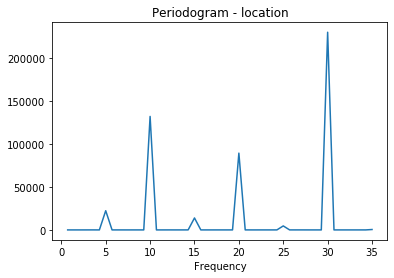

In [19]:
plt.plot(Location[1:50]*3600, Pxx_den[1:50]*len(Location ))
plt.title('Periodogram - location')
plt.xlabel('Frequency')


## 1.7

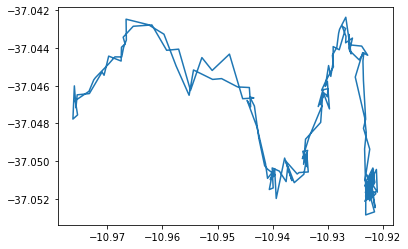

In [20]:
plt.plot(traj["latitude"][:181],traj["longitude"][:181])

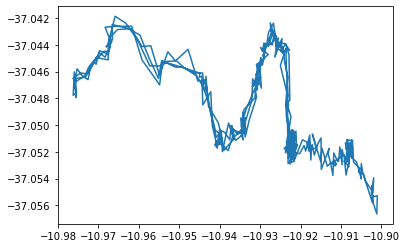

In [21]:
plt.plot(traj["latitude"][:721],traj["longitude"][:721])

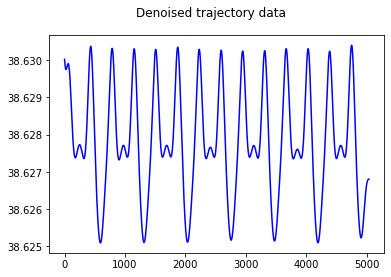

In [22]:
import numpy as np
import scipy.signal as signal
distance = np.sqrt(location2)

differences = np.diff(traj["time"].values)
dt=differences[0]*3600

# First, design the Buterworth filter
N  = 3    # Filter order
Wn = 0.01 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')

fig=plt.figure()
fig.suptitle('Denoised trajectory data')
smooth_data = signal.filtfilt(B,A, distance)

plt.plot(smooth_data,'b-')
plt.show()


<Figure size 432x288 with 0 Axes>

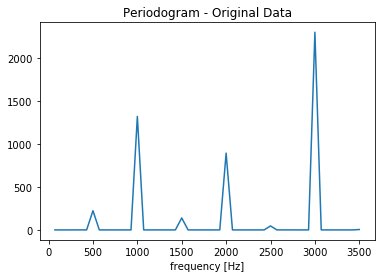

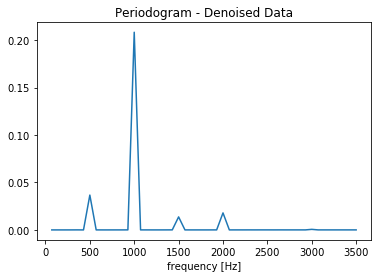

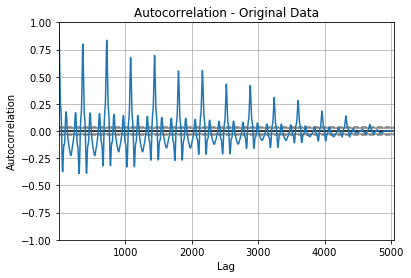

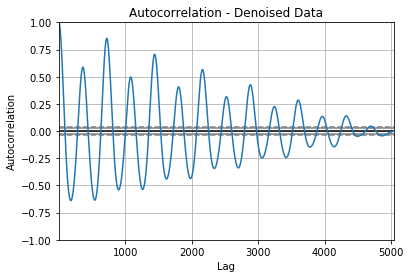

<Figure size 432x288 with 0 Axes>

In [101]:
fs = 100

f, Pxx_den = signal.periodogram(location2, fs)
plt.plot(f[1:50]*3600, Pxx_den[1:50]*len(f))
plt.xlabel('frequency [Hz]')
#plt.ylabel('PSD [V**2/Hz]')
plt.title('Periodogram - Original Data')
plt.figure()


f, Pxx_den = signal.periodogram(smooth_data, fs)
plt.plot(f[1:50]*3600, Pxx_den[1:50]*len(f))
plt.xlabel('frequency [Hz]')
#plt.ylabel('PSD [V**2/Hz]')
plt.title('Periodogram - Denoised Data')
plt.figure()


autocorrelation_plot(location2)

plt.title('Autocorrelation - Original Data')
plt.figure()


autocorrelation_plot(smooth_data)

plt.title('Autocorrelation - Denoised Data')
plt.figure()


## 2.1

In [24]:
import pandas as pd
spatial = pd.read_csv ('2034690_spatial.csv',header=0, index_col=0, parse_dates=True, squeeze=True)

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pysal.model.spreg as sp
import pysal.lib as pslib
import pysal.explore.esda as es
import pysal as ps

#import libpsyal as ps
#import spreg as sp 
#import esda as es
import geopandas as gpd

C:\Users\Aldo\Anaconda3\envs\TM1920\lib\site-packages\pysal\explore\segregation\network\network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
C:\Users\Aldo\Anaconda3\envs\TM1920\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [26]:
spatial.head()

,Unnamed: 0.1,name,capital,population,latitude,longitude,Virus X
0,0,Sierra,Downieville,3380,36.985898,-119.232078,1
1,1,Sacramento,Sacramento,1424415,38.573659,-121.487147,814
2,2,Santa Barbara,Santa Barbara,428655,34.423403,-119.704416,143
3,3,Calaveras,San Andreas,46127,38.231085,-120.619990,3
4,4,Ventura,Ventura,831587,34.265900,-119.258366,313


Text(0.5, 1.0, 'Incidence map')

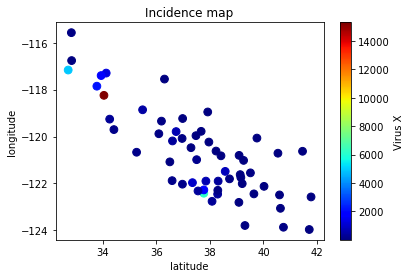

In [27]:


fig, ax = plt.subplots()
spatial.plot(kind='scatter', x='latitude', y='longitude', s=60, c='Virus X', cmap='jet', ax=ax) 
plt.title('Incidence map')

## 2.2

Text(0.5, 1.0, 'Histogram - Virus X')

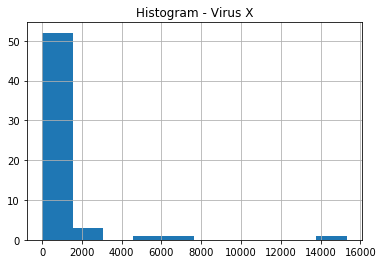

In [28]:
spatial['Virus X'].hist()
plt.title('Histogram - Virus X')

Text(0.5, 1.0, 'QQplot - Virus X')

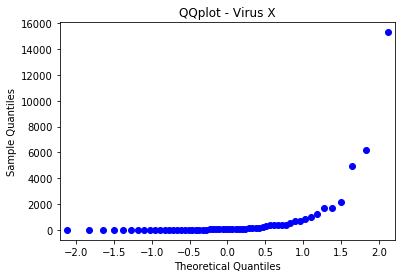

In [29]:
import statsmodels.api as sm
sm.qqplot(spatial['Virus X'])
plt.title('QQplot - Virus X')

In [30]:
import numpy as np
log = np.log2(spatial['Virus X'])

Text(0.5, 1.0, 'Histogram - Virus X normalized')

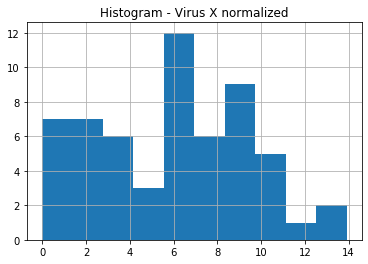

In [31]:
log = np.log2(spatial['Virus X'])
log.hist()
plt.title('Histogram - Virus X normalized')


Text(0.5, 1.0, 'QQplot - Virus X normalized')

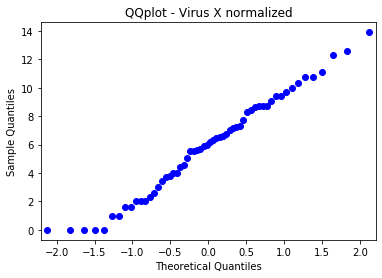

In [32]:
sm.qqplot(log)
plt.title('QQplot - Virus X normalized')

## 2.3

In [33]:
log1 =pd.DataFrame(log)

In [34]:
log1.columns= ['Virus']

In [35]:
result = pd.merge(spatial, log1, on=spatial.index)

In [36]:
matrix = np.array(result[['latitude','longitude','Virus']])

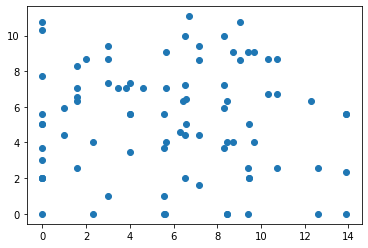

In [37]:
import scipy.stats as stats
from scipy.spatial.distance import pdist, squareform
from scipy.stats import norm 
lag =4
tol = 0.2


# Calculates the pairwise distances between two points
pwdist = squareform(pdist(matrix[:,:2]))
#pwdist = squareform(pdist(P[:,:2]))
# grab the coordinates in a given range: lag +/- tolerance
i, j = np.where((pwdist >= lag - tol) & (pwdist < lag + tol))
# lagindices(pwdist, lag, tol)
# take out the repeated elements,
# since p is a *symmetric* distance matrix
indices=np.c_[i, j][np.where(j > i)]

plt.scatter(matrix[indices[:,0],2],matrix[indices[:, 1],2])

Text(0.5, 1.0, 'lag 8')

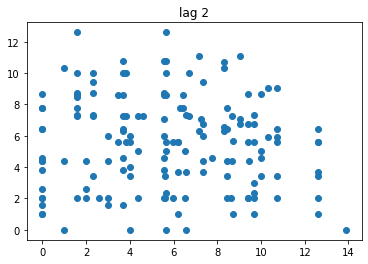

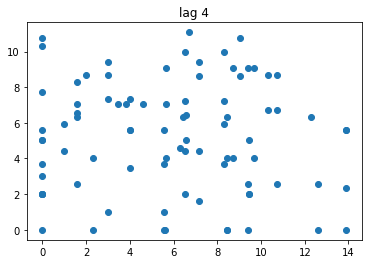

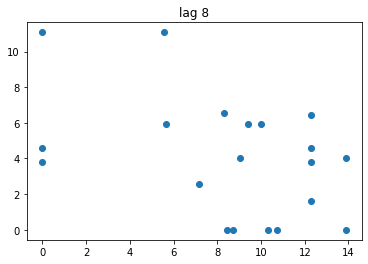

In [38]:


lag = 2
# Calculates the pairwise distances between two points
pwdist = squareform(pdist(matrix[:,:2]))
# grab the coordinates in a given range: lag +/- tolerance
i, j = np.where((pwdist >= lag - tol) & (pwdist < lag + tol))
indices=np.c_[i, j][np.where(j > i)]
plt.figure()

plt.scatter(matrix[indices[:, 0],2],matrix[indices[:, 1],2])
plt.title('lag 2')


lag = 4
# Calculates the pairwise distances between two points
pwdist = squareform(pdist(matrix[:,:2]))
# grab the coordinates in a given range: lag +/- tolerance
i, j = np.where((pwdist >= lag - tol) & (pwdist < lag + tol))
indices=np.c_[i, j][np.where(j > i)]
plt.figure()

plt.scatter(matrix[indices[:, 0],2],matrix[indices[:, 1],2])
plt.title('lag 4')

lag = 8
# Calculates the pairwise distances between two points
pwdist = squareform(pdist(matrix[:,:2]))
# grab the coordinates in a given range: lag +/- tolerance
i, j = np.where((pwdist >= lag - tol) & (pwdist < lag + tol))
indices=np.c_[i, j][np.where(j > i)]
plt.figure()

plt.scatter(matrix[indices[:, 0],2],matrix[indices[:, 1],2])
plt.title('lag 8')

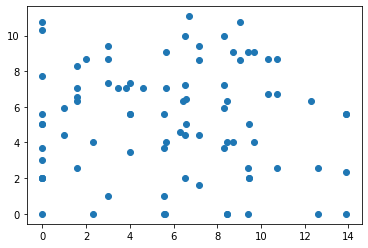

In [39]:

lag = 4
# Calculates the pairwise distances between two points
pwdist = squareform(pdist(matrix[:,:2]))
# grab the coordinates in a given range: lag +/- tolerance
i, j = np.where((pwdist >= lag - tol) & (pwdist < lag + tol))
indices=np.c_[i, j][np.where(j > i)]
plt.figure()

plt.scatter(matrix[indices[:, 0],2],matrix[indices[:, 1],2])

## 2.4

In [40]:
def lagindices(pwdist,lag,tol):
    # grab the coordinates in a given range: lag +/- tolerance
    i, j = np.where((pwdist >= lag - tol) & (pwdist < lag + tol))
    # take out the repeated elements,
    # since p is a *symmetric* distance matrix
    indices=np.c_[i, j][np.where(j > i)]
    return indices

def semivariance(data, indices):
    z=(data[indices[:, 0], 2] - data[indices[:, 1], 2])**2.0
    return np.mean(z) / 2.0

Text(0.5, 1.0, 'Variogram')

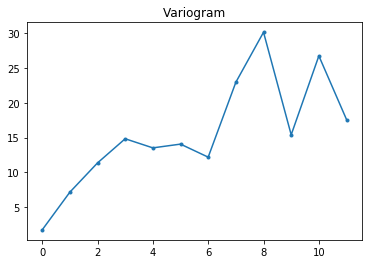

In [41]:
tolerance = 0.2
lags = np.arange(12)
pwdist = squareform(pdist(matrix[:,:2]))

# create a list of lists of indices of points having the ~same lag
index = [lagindices(pwdist, lag, tol) for lag in lags]
# remove indexs which are empty 
index = list(filter(lambda x: len(x) > 0, index))
     
v = [semivariance(matrix, indices) for indices in index]


plt.figure()
plt.plot(lags,v,'.-')
plt.title('Variogram' )


Text(0.5, 1.0, 'Variogram - Linear model')

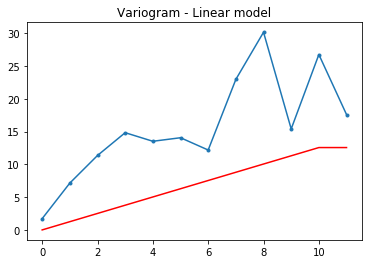

In [42]:
import variogram_model as model
sill = np.var(matrix[:, 2])
variogram_model1 = model.semivariance(model.linear, [10, sill])

plt.figure()
plt.plot(lags,v,'.-')
plt.plot(lags, variogram_model1(lags), 'r')
plt.title('Variogram - Linear model')

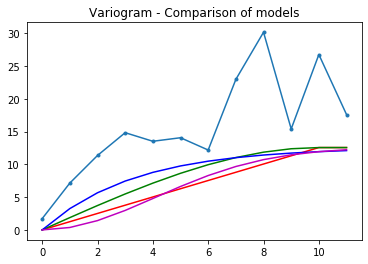

In [43]:
variogram_model1 = model.semivariance(model.linear, [10, sill])
variogram_model2 = model.semivariance(model.spherical, [10, sill])
variogram_model3 = model.semivariance(model.exponential, [10, sill])
variogram_model4 = model.semivariance(model.gaussian, [10, sill])


plt.plot(lags,v,'.-')
plt.title('Variogram - Comparison of models')
plt.plot(lags, variogram_model1(lags), 'r')
plt.plot(lags, variogram_model2(lags), 'g')
plt.plot(lags, variogram_model3(lags), 'b')
plt.plot(lags, variogram_model4(lags), 'm')


## 2.5

In [44]:
import kriging as kriging

sill = np.var(matrix[:, 2])
# using kriging to interpolate between the images
covfct = model.covariance(model.exponential, (200, sill))

print (kriging.simple(matrix, covfct, [35, -120], N=6))
print (kriging.simple(matrix, covfct, [37, -121], N=6))

(7.2262187831314035, 0.34885240839899984)
(4.789225965617195, 0.2955618412455092)


## 2.6

In [45]:
import geopandas as gpd

gpddf = gpd.read_file("CA_Counties\CA_Counties_TIGER2016.shp")
#if you are using a MAC, comment the above line and uncomment the line below:

# gpddf = gpd.read_file("CA_Counties/CA_Counties_TIGER2016.shp")

gpddf.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((-13431319.751 4821511.426, -13431312..."
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-13490651.476 4680831.603, -13490511..."
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,"MULTIPOLYGON (((-13423116.772 4042044.149, -13..."
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483 4627725.228, -13428534..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4773390489,945942791,+34.3587415,-119.1331432,"MULTIPOLYGON (((-13317853.594 3931602.414, -13..."


## 2.7

In [46]:
import numpy as np
population = np.array(result['population'])
area = gpddf['geometry'].apply(lambda g: g.area)



In [47]:
Density = population/area


In [48]:
KNN = pslib.weights.KNN.from_array(result.loc[\
                               result.index, \
                              ['longitude', 'latitude']\
                              ].values)

In [49]:
queen = ps.lib.weights.Queen.from_dataframe(gpddf)

In [50]:
rook = ps.lib.weights.Rook.from_dataframe(gpddf)

In [51]:
table=result.assign(Density=Density)
display(table)

,key_0,Unnamed: 0.1,name,capital,population,latitude,longitude,Virus X,Virus,Density
0,0,0,Sierra,Downieville,3380,36.985898,-119.232078,1,0.000000,8.046758e-07
1,1,1,Sacramento,Sacramento,1424415,38.573659,-121.487147,814,9.668885,3.387217e-04
2,2,2,Santa Barbara,Santa Barbara,428655,34.423403,-119.704416,143,7.159871,2.956566e-05
3,3,3,Calaveras,San Andreas,46127,38.231085,-120.619990,3,1.584963,1.058878e-05
4,4,4,Ventura,Ventura,831587,34.265900,-119.258366,313,8.290019,9.884204e-05
5,5,5,Los Angeles,Los Angeles,10363850,34.052187,-118.243425,15304,13.901621,5.746723e-04
6,6,6,Sonoma,Santa Rosa,484470,38.291942,-122.457776,415,8.696968,6.465759e-05
7,7,7,Kings,Hanford,154434,36.098849,-119.881520,95,6.569856,2.793381e-05
8,8,8,San Diego,San Diego,3146274,32.718834,-117.163841,4944,12.271463,1.881585e-04
9,9,9,Placer,Auburn,333401,39.091575,-120.803947,51,5.672425,5.158712e-05


In [53]:
I_neigh_median_pr =  ps.explore.esda.moran.Moran(table['Density'].values, KNN)
print('Density - KNN - Global Autocorrelation:', I_neigh_median_pr.I, I_neigh_median_pr.p_sim)
I_neigh_median_pr =  ps.explore.esda.moran.Moran(table['Density'].values, queen)
print('Density - queen - Global Autocorrelation:', I_neigh_median_pr.I, I_neigh_median_pr.p_sim)
I_neigh_median_pr =  ps.explore.esda.moran.Moran(table['Density'].values, rook)
print('Density - rook - Global Autocorrelation:', I_neigh_median_pr.I, I_neigh_median_pr.p_sim)


Density - KNN - Global Autocorrelation: 0.4775199272600606 0.001
Density - queen - Global Autocorrelation: 0.3445138254800816 0.001
Density - rook - Global Autocorrelation: 0.3509267562070618 0.001


In [54]:
I_neigh_median_pr =  ps.explore.esda.moran.Moran(table['Virus'].values, KNN)
print('Virus - KNN - Global Autocorrelation:', I_neigh_median_pr.I, I_neigh_median_pr.p_sim)
I_neigh_median_pr =  ps.explore.esda.moran.Moran(table['Virus'].values, queen)
print('Virus - queen - Global Autocorrelation:', I_neigh_median_pr.I, I_neigh_median_pr.p_sim)
I_neigh_median_pr =  ps.explore.esda.moran.Moran(table['Virus'].values, rook)
print('Virus - rook - Global Autocorrelation:', I_neigh_median_pr.I, I_neigh_median_pr.p_sim)


Virus - KNN - Global Autocorrelation: 0.4870220892326983 0.001
Virus - queen - Global Autocorrelation: 0.5074292834748507 0.001
Virus - rook - Global Autocorrelation: 0.5075579894410569 0.001


Text(0.5, 1, 'Density - rook - Local Autocorrelation:')

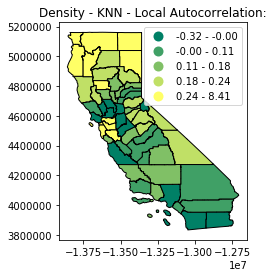

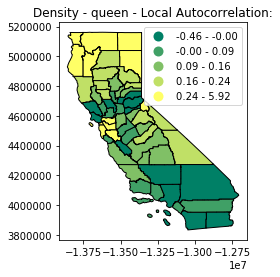

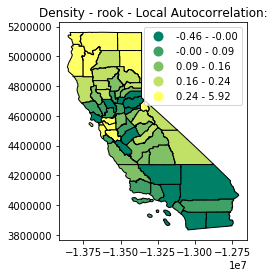

In [55]:
I_neigh_median_prl =  ps.explore.esda.moran.Moran_Local(table['Density'].values, KNN)
graph.assign(localknn=I_neigh_median_prl.Is).plot( column='localknn', scheme='QUANTILES',  k=5, cmap='summer', edgecolor='k', legend=True)
plt.title('Density - KNN - Local Autocorrelation:')


I_neigh_median_prl =  ps.explore.esda.moran.Moran_Local(table['Density'].values, queen)
graph.assign(localqueen=I_neigh_median_prl.Is).plot( column='localqueen', scheme='QUANTILES',  k=5, cmap='summer', edgecolor='k', legend=True)
plt.title('Density - queen - Local Autocorrelation:')

I_neigh_median_prl =  ps.explore.esda.moran.Moran_Local(table['Density'].values, rook)
graph.assign(localrook=I_neigh_median_prl.Is).plot( column='localrook', scheme='QUANTILES',  k=5, cmap='summer', edgecolor='k', legend=True)
plt.title('Density - rook - Local Autocorrelation:')


Text(0.5, 1, 'Virus - rook - Local Autocorrelation:')

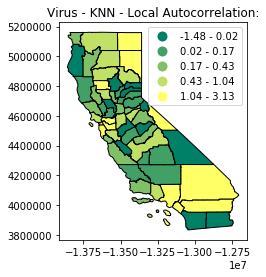

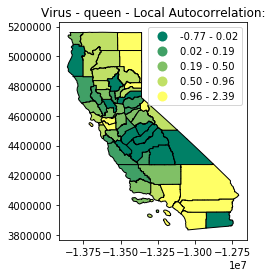

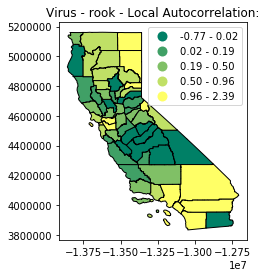

In [56]:
I_neigh_median_prl =  ps.explore.esda.moran.Moran_Local(table['Virus'].values, KNN)
graph.assign(Vlocalknn=I_neigh_median_prl.Is).plot( column='Vlocalknn', scheme='QUANTILES',  k=5, cmap='summer', edgecolor='k', legend=True)
plt.title('Virus - KNN - Local Autocorrelation:')

I_neigh_median_prl =  ps.explore.esda.moran.Moran_Local(table['Virus'].values, queen)
graph.assign(Vlocalqueen=I_neigh_median_prl.Is).plot( column='Vlocalqueen', scheme='QUANTILES',  k=5, cmap='summer', edgecolor='k', legend=True)
plt.title('Virus - queen - Local Autocorrelation:')

I_neigh_median_prl =  ps.explore.esda.moran.Moran_Local(table['Virus'].values, rook)
graph.assign(Vlocalrook=I_neigh_median_prl.Is).plot( column='Vlocalrook', scheme='QUANTILES',  k=5, cmap='summer', edgecolor='k', legend=True)
plt.title('Virus - rook - Local Autocorrelation:')

In [88]:
Pop_density = pd.DataFrame(gpddf['NAME'])
I_province_elevation = ps.explore.esda.moran.Moran_Local(table['Density'].values, KNN)
Pop_density = Pop_density.assign(Density_KNN_Is=I_province_elevation.Is,Density_KNN_p_sim=I_province_elevation.p_sim)

I_province_elevation = ps.explore.esda.moran.Moran_Local(table['Density'].values, queen)
Pop_density = Pop_density.assign(Density_queen_Is=I_province_elevation.Is,Density_queen_p_sim=I_province_elevation.p_sim)

I_province_elevation = ps.explore.esda.moran.Moran_Local(table['Density'].values, rook)
Pop_density = Pop_density.assign(Density_rook_Is=I_province_elevation.Is,Density_rook_p_sim=I_province_elevation.p_sim)
Pop_density.head()

,NAME,Density_KNN_Is,Density_KNN_p_sim,Density_queen_Is,Density_queen_p_sim,Density_rook_Is,Density_rook_p_sim
0,Sierra,0.174525,0.442,0.232190,0.087,0.232190,0.086
1,Sacramento,-0.039681,0.262,0.060365,0.334,0.060365,0.370
2,Santa Barbara,0.051258,0.355,0.075333,0.488,0.075333,0.471
3,Calaveras,0.212705,0.154,0.113362,0.402,0.113362,0.400
4,Ventura,0.146087,0.054,0.084768,0.093,0.084768,0.091


In [89]:
Virus_incidence=  pd.DataFrame(gpddf['NAME'])
I_province_elevation = ps.explore.esda.moran.Moran_Local(table['Virus'].values, KNN)
Virus_incidence = Virus_incidence.assign(Virus_KNN_Is=I_province_elevation.Is,Virus_KNN_p_sim=I_province_elevation.p_sim)

I_province_elevation = ps.explore.esda.moran.Moran_Local(table['Virus'].values, queen)
Virus_incidence= Virus_incidence.assign(Virus_queen_Is=I_province_elevation.Is,Virus_queen_p_sim=I_province_elevation.p_sim)

I_province_elevation = ps.explore.esda.moran.Moran_Local(table['Virus'].values, rook)
Virus_incidence = Virus_incidence.assign(Virus_rook_Is=I_province_elevation.Is,Virus_rook_p_sim=I_province_elevation.p_sim)
Virus_incidence.head()

,NAME,Virus_KNN_Is,Virus_KNN_p_sim,Virus_queen_Is,Virus_queen_p_sim,Virus_rook_Is,Virus_rook_p_sim
0,Sierra,-0.908494,0.226,1.310562,0.048,1.310562,0.044
1,Sacramento,0.420862,0.284,0.214116,0.255,0.214116,0.238
2,Santa Barbara,0.174095,0.230,0.219613,0.150,0.219613,0.119
3,Calaveras,0.627545,0.214,0.337859,0.237,0.337859,0.249
4,Ventura,0.864653,0.024,0.773097,0.020,0.773097,0.023


In [100]:
Virus_incidence.nlargest(5,"Virus_KNN_Is")

,NAME,Virus_KNN_Is,Virus_KNN_p_sim,Virus_queen_Is,Virus_queen_p_sim,Virus_rook_Is,Virus_rook_p_sim
25,Alpine,-1.477706,0.124,1.314356,0.029,1.314356,0.031
0,Sierra,-0.908494,0.226,1.310562,0.048,1.310562,0.044
29,San Benito,-0.809172,0.225,-0.773892,0.091,-0.773892,0.109
19,Inyo,-0.682836,0.274,-0.429511,0.253,-0.429511,0.258
46,Stanislaus,-0.333580,0.198,0.026447,0.451,0.026447,0.429


In [98]:
Virus_incidence.nlargest(5,"Virus_queen_Is")

,NAME,Virus_KNN_Is,Virus_KNN_p_sim,Virus_queen_Is,Virus_queen_p_sim,Virus_rook_Is,Virus_rook_p_sim
47,Orange,2.594086,0.002,2.387470,0.002,2.387470,0.001
5,Los Angeles,3.127668,0.012,2.367226,0.014,2.367226,0.015
10,San Francisco,1.977320,0.062,1.784677,0.027,1.784677,0.016
8,San Diego,-0.269784,0.432,1.664758,0.033,1.664758,0.033
31,Riverside,1.807283,0.029,1.507016,0.006,1.507016,0.002


In [99]:
Virus_incidence.nlargest(5,"Virus_rook_Is")

,NAME,Virus_KNN_Is,Virus_KNN_p_sim,Virus_queen_Is,Virus_queen_p_sim,Virus_rook_Is,Virus_rook_p_sim
47,Orange,2.594086,0.002,2.387470,0.002,2.387470,0.001
5,Los Angeles,3.127668,0.012,2.367226,0.014,2.367226,0.015
10,San Francisco,1.977320,0.062,1.784677,0.027,1.784677,0.016
8,San Diego,-0.269784,0.432,1.664758,0.033,1.664758,0.033
31,Riverside,1.807283,0.029,1.507016,0.006,1.507016,0.002


## 2.8

In [60]:
#values = pd.DataFrame(series.values)
dataframe = pd.concat([table['Virus'].shift(1), table['Density']], axis=1)
result2 = dataframe.corr()
print(result2)


            Virus   Density
Virus    1.000000  0.039728
Density  0.039728  1.000000
